<a href="https://colab.research.google.com/github/xinyiguan/JoystickTracking_ECoG_Decoding/blob/main/JoystickTracking_ECoG_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of Joystick Tracking dataset

---

> By: Xinyi Guan


This notebook contains the scripts for data visualization of the Joystick Tracking ECoG dataset.

In [1]:
# @title Install

!pip install mne

     |████████████████████████████████| 6.9 MB 3.6 MB/s 


In [12]:
# @title Imports

import os, requests
import numpy as np
from matplotlib import rcParams 
from matplotlib import pyplot as plt

In [13]:
# @title Load dataset from osf

fname = 'joystick_track.npz'
url = "https://osf.io/6jncm/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


In [21]:
# @title Load all data for single subject from dataset

# @markdown 1. Loading V for selected subject
# @markdown - change the subjID (index goes from 0 to 3)

alldat = np.load(fname, allow_pickle=True)['dat']
dat = alldat[0]

## CHANGE ID HERE =====================================

subjID=2 #index goes from 0 to 3

## ====================================================

subj = dat[subjID]
subj_name = str('subject '+ str(subjID))
print(subj_name)
print('subj.keys: ', subj.keys())


# @markdown 2. Parameters (dict keys) of selected subject
V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs    = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]] 
hemisphere = subj['hemisphere']       # list of strings
lobe = subj['lobe']                   # ...
gyrus = subj['gyrus']                 # ...
Brodmann_Area = subj['Brodmann_Area'] # ...


subject 2
subj.keys:  dict_keys(['V', 'targetX', 'targetY', 'cursorX', 'cursorY', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


# 1: Visualization function:

To plot the movement trajectory, simply copy the following "helper functions" block code. Specifiy your inputs for the ```plot_mvmt_trajectory``` function:

*   `xs` is the cursor/target position along x-axis
*   `ys` is the cursor/target position along y-axis
*   `spacing_index` is the spacing within the sequence (i.e., how many points you want to skip plotting) 

*   `title` title your plot






In [19]:
# @title 1.1. Functions: 2D Movement Trajectory plot
import numpy as np
from matplotlib import pyplot as plt

def sample_indices(seq, starting_index, k):
  resulted_seq = seq[starting_index::k]
  n = int(len(seq))
  index_list = list((np.arange(n)*k)[:len(resulted_seq)])
  return resulted_seq, index_list


def plot_mvmt_trajectory(xs, ys, spacing_index, title):
  xs_seq_val = sample_indices(xs, 0, spacing_index)[0]
  ys_seq_val = sample_indices(ys, 0, spacing_index)[0]
  indices = sample_indices(ys, 0, spacing_index)[1]
  print('num of sampled pts from sequences', len(indices))

  ax = plt.axes(aspect=1)
  ax.scatter(xs_seq_val,ys_seq_val, c=indices, s=2)
  ax.set_xlim(-2000, 34500)
  ax.set_ylim(-2000,34500)
  ax.set_title(title)  



num of sampled pts from sequences 2688


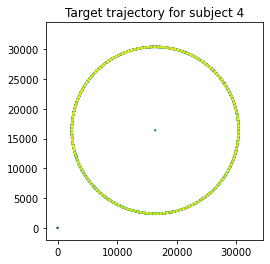

In [18]:
# @title Sample plot 1 
# @markdown movement trajectory of target for subject 4 over time 


xs_target = targetX[:]
ys_target = targetY[:]

plot_mvmt_trajectory(xs_target, ys_target, spacing_index=50, title = 'Target trajectory for ' + subj_name)

num of sampled pts from sequences 3359


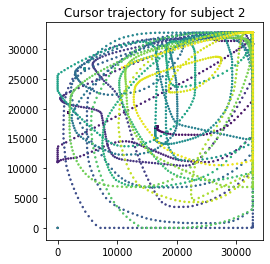

In [24]:
# @title Sample plot 2
# @markdown movement trajectory of cursor for subject 4 over time 


xs_cursor_m = cursorX[:]
ys_cursor_m = cursorY[:]

plot_mvmt_trajectory(xs_cursor_m, ys_cursor_m, spacing_index=40, title = 'Cursor trajectory for '+subj_name)

num of sampled pts from sequences 200


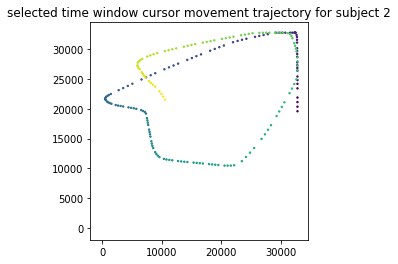

In [28]:
# @title Sample plot 3 
# @markdown Movement trajectory of cursor for subject 4 during selected time window (1000~15000) 


xs_cursor_sel = cursorX[15000:25000]
ys_cursor_sel = cursorY[15000:25000]

plot_mvmt_trajectory(xs_cursor_sel,ys_cursor_sel,spacing_index=50, title = 'selected time window cursor movement trajectory for '+subj_name)


In [ ]:
# @title 1.2. Neural response of the correspoding cursor position plot (3D plot)

from mpl_toolkits import mplot3d

def plot_3d_neuralresp_vs_position(xs, ys, zs, spacing_index, title):
  """
  xs is the cursor/target position along x-axis
  ys is the cursor/target position along y-axis
  zs is the corresponding voltage value at that position
  """
  # zs = V[:,2]
  xs_seq_val = sample_indices(xs, 0, spacing_index)[0]
  ys_seq_val = sample_indices(ys, 0, spacing_index)[0]
  zs_seq_val = sample_indices(zs, 0, spacing_index)[0]
  
  indices = sample_indices(xs, 0, spacing_index)[1]
  ax = plt.axes(projection='3d')
  ax.scatter(xs_seq_val,ys_seq_val,zs_seq_val, cmap='viridis', c=indices, s=12, linewidth=0.2)

  ax.set_title(title)
  ax.set_xlabel('x-axis position')
  ax.set_ylabel('y-axis position')
  ax.set_zlabel('averaged voltage value')



In [ ]:
print(V.shape) # n_time x n_channel

print(V[0].shape)

(259920, 48)
(48,)


In [ ]:
# @markdown get average(mean) of the neural response across channels

avg_v = np.mean(V, axis=1)


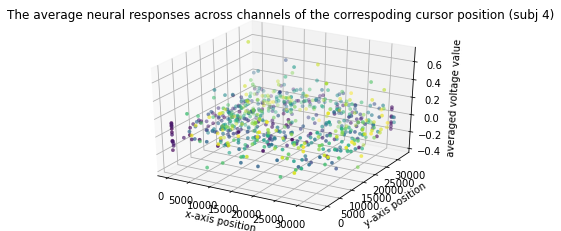

In [ ]:
# @title Sample plot
# @markdown average neural responses across channels of the correspoding cursor position
xs = cursorX[:]
ys = cursorY[:]
zs = avg_v # plot channel 2
plot_3d_neuralresp_vs_position(xs, ys, zs, 400, title = 'The average neural responses across channels of the correspoding cursor position (subj 4)')



# 2: Plot raw ECoG data (MNE section)

In [4]:
# @title 2.0. Import mne

import mne
# For elimiating warnings
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import mne.viz


In [5]:
# @title 2.1 Load all data for single subject from dataset

# @markdown 1. Loading V for selected subject
# @markdown - change the subjID (index goes from 0 to 3)

alldat = np.load(fname, allow_pickle=True)['dat']
dat = alldat[0]

## CHANGE ID HERE =====================================

subjID=1 #index goes from 0 to 3

## ====================================================

subj = dat[subjID]
subj_name = str('subject '+ str(subjID))
print(subj_name)
print('subj.keys: ', subj.keys())


# @markdown 2. Parameters (dict keys) of selected subject
V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs    = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]] 
hemisphere = subj['hemisphere']       # list of strings
lobe = subj['lobe']                   # ...
gyrus = subj['gyrus']                 # ...
Brodmann_Area = subj['Brodmann_Area'] # ...


subject 1
subj.keys:  dict_keys(['V', 'targetX', 'targetY', 'cursorX', 'cursorY', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [6]:
# @title 2.1.1. Create MNE object (original raw)

data = V.T
n_channels = V.shape[1]
sampling_freq = 1000  # in Hertz
ch_types = ['ecog']*n_channels
ch_names = ['chan'+str(channel) for channel in list(range(n_channels))]

info = mne.create_info(ch_names, sfreq=sampling_freq, ch_types='ecog', verbose=None)

raw = mne.io.RawArray(data, info)
print(raw.info)



Creating RawArray with float64 data, n_channels=64, n_times=248640
    Range : 0 ... 248639 =      0.000 ...   248.639 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: chan0, chan1, chan2, chan3, chan4, chan5, chan6, chan7, chan8, ...
 chs: 64 ECOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


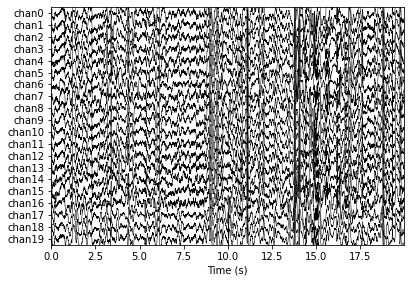

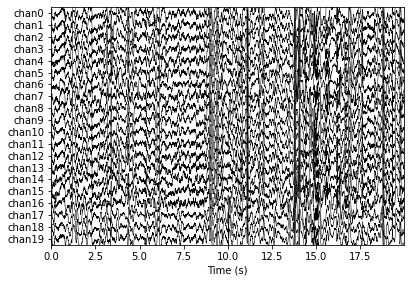

In [7]:
# @title 2.1.2. Plot raw channels

mne.viz.plot_raw(raw, n_channels=20, start = 0, duration = 20, scalings='auto', title='Raw signals', 
         show=True, block=True, show_scalebars=False, show_scrollbars=False)

In [8]:
# @title 2.2. Plotting extended raw
# @markdown - Loading V

# @markdown - Plot selected channels for selected time window:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 8]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

alldat = np.load(fname, allow_pickle=True)['dat']
dat = alldat[0]

## CHANGE ID HERE =====================================

subjID=1 #index goes from 0 to 3

## ====================================================

subj = dat[subjID]
subj_name = str('subject '+ str(subjID))

# @markdown - Set parameters (dict keys) of selected subject
V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs    = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]] 
hemisphere = subj['hemisphere']       # list of strings
lobe = subj['lobe']                   # ...
gyrus = subj['gyrus']                 # ...
Brodmann_Area = subj['Brodmann_Area'] # ...


In [10]:
# @title 2.2.1. Create an extended raw object 
# @markdown add targetX, targetY, cursorX, cursorY as channel to raw object with selected channels

V_data = V.T #(n_channel x n_times), len(V_data[0]) = 134360

position_data = np.vstack((cursorX, targetX, cursorY, targetY))

extended_data = np.vstack((V_data, position_data))

n_ecog_channels = V.shape[1]

sampling_freq = 1000  # in Hertz
ex_ch_types = ['ecog']*n_ecog_channels + ['misc']*4
ex_ch_names = ['chan'+str(channel) for channel in list(range(n_ecog_channels))]+ ['Xcur']+['Xtar']+ ['Ycur']+ ['Ytar']


ex_info = mne.create_info(ex_ch_names, sfreq=sampling_freq, ch_types=ex_ch_types, verbose=None)

extended_raw = mne.io.RawArray(extended_data, ex_info)
# print(extended_raw.info)

Creating RawArray with float64 data, n_channels=68, n_times=248640
    Range : 0 ... 248639 =      0.000 ...   248.639 secs
Ready.


In [14]:
# @markdown ### Select which channels and the time window to plot
# @markdown Either specify includes or excludes.

# @markdown Note: the max num of channels can plot is 20.

# channels: 
excludes = ['chan'+str(channel) for channel in list(range(0,50))]
includes = ['chan'+str(channel) for channel in list(range(25,41))]+['Xtar']+['Ytar']+ ['Xcur']+ ['Ycur']
#includes = ['chan'+str(channel) for channel in list(range(48,n_ecog_channels))]+['Xtar']+['Ytar']+ ['Xcur']+ ['Ycur']

picks = mne.pick_channels(ch_names=ex_ch_names, include=includes, exclude=[])

# time window (specifiy starting time and duration):
start = 0
duration = 30

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


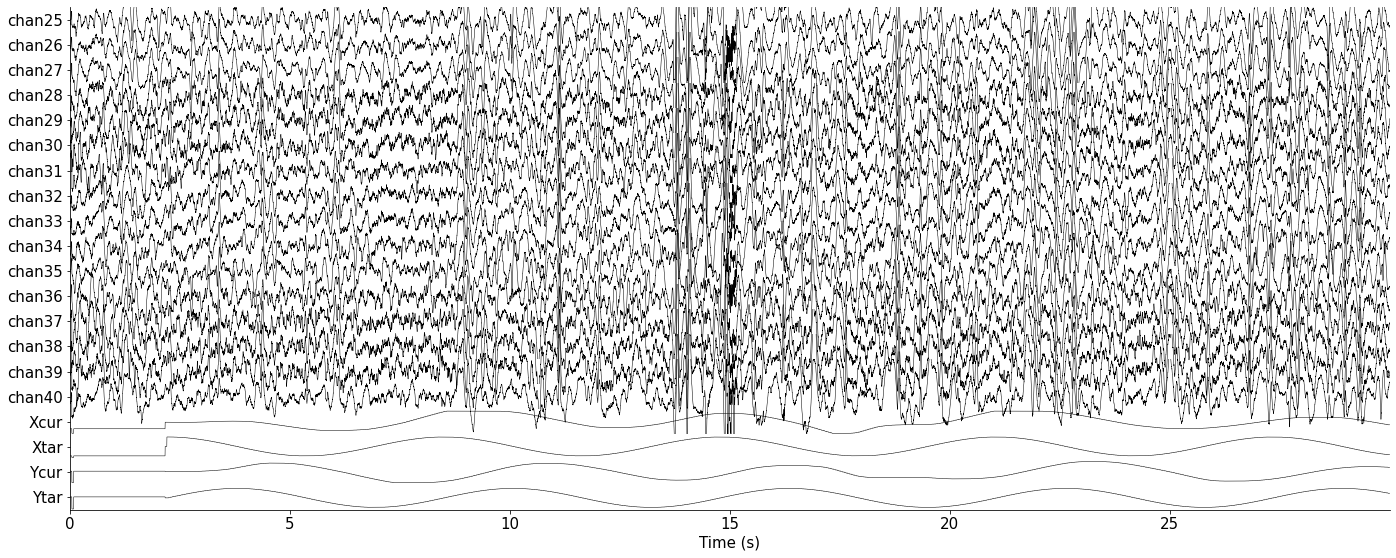

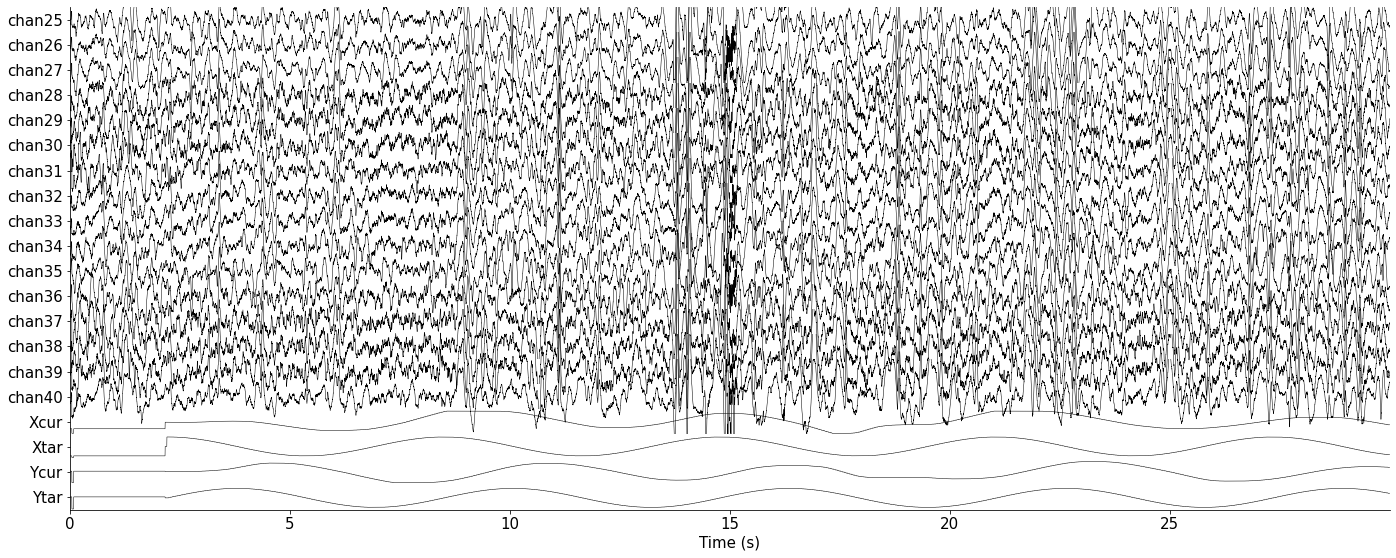

In [15]:
# @title 2.2.2. Plot selected channels for selected time window:


mne.viz.plot_raw(extended_raw, duration=duration, start=start, scalings='auto', title='Selected channels for selected time window', 
         show=True, block=True, show_scalebars=False, show_scrollbars=False, order=picks)

# 3: Visualized one channel with neuralDSP

In [ ]:
# @title install & import neuralDSP
! pip install neurodsp
from neurodsp.utils import create_times
from neurodsp.plts.time_series import plot_time_series, plot_instantaneous_measure



In [ ]:
# @title 3.1 set parameters
fs = 1000
times = create_times(len(V[:, 0])/fs, fs)
print(times)

[0.00000e+00 1.00000e-03 2.00000e-03 ... 2.48637e+02 2.48638e+02
 2.48639e+02]


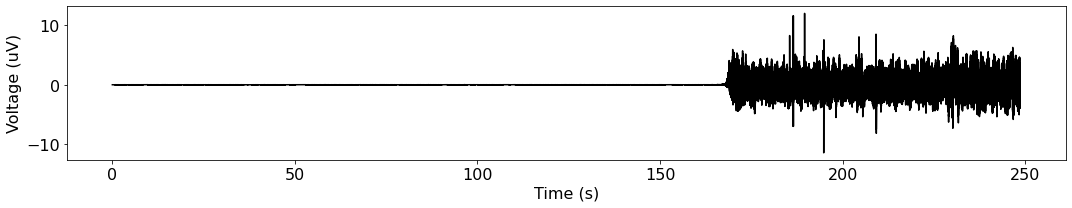

In [ ]:
# @title 3.2 plot
plot_time_series(times, V[:,57])

# 4: Notch filter with MNE

Can be independent from previous sections (1-3)


Filter from extended raw


In [4]:
# @title Install and imports
!pip install mne

import mne

In [5]:
# @title 4.1. Get the extended raw
# @title Load all data for single subject from dataset

# @markdown 1. Loading V for selected subject
# @markdown - change the subjID (index goes from 0 to 3)

alldat = np.load(fname, allow_pickle=True)['dat']
dat = alldat[0]

## CHANGE ID HERE =====================================

subjID=1 #index goes from 0 to 3

## ====================================================

subj = dat[subjID]
subj_name = str('subject '+ str(subjID))
print(subj_name)
print('subj.keys: ', subj.keys())


# @markdown 2. Parameters (dict keys) of selected subject
V = subj['V'].astype('float32')
targetX = subj['targetX'].flatten()   # np array 1D
targetY = subj['targetY'].flatten()   # np array 1D
cursorX = subj['cursorX'].flatten()   # np array 1D
cursorY = subj['cursorY'].flatten()   # np array 1D
locs    = subj['locs']                # [[a1 b1 c1] [a2 b2 c2] ... [a60 b60 c60]] 
hemisphere = subj['hemisphere']       # list of strings
lobe = subj['lobe']                   # ...
gyrus = subj['gyrus']                 # ...
Brodmann_Area = subj['Brodmann_Area'] # ...


# @markdown 3. Create an extended raw object:  
# @markdown - add targetX, targetY, cursorX, cursorY as channel to raw object with selected channels

V_data = V.T #(n_channel x n_times), len(V_data[0]) = 134360

position_data = np.vstack((cursorX, targetX, cursorY, targetY))

extended_data = np.vstack((V_data, position_data))

n_ecog_channels = V.shape[1]

sampling_freq = 1000  # in Hertz
ex_ch_types = ['ecog']*n_ecog_channels + ['misc']*4
ex_ch_names = ['chan'+str(channel) for channel in list(range(n_ecog_channels))]+ ['Xcur']+['Xtar']+ ['Ycur']+ ['Ytar']


ex_info = mne.create_info(ex_ch_names, sfreq=sampling_freq, ch_types=ex_ch_types, verbose=None)
extended_raw = mne.io.RawArray(extended_data, ex_info)

print(extended_raw.info)

subject 1
subj.keys:  dict_keys(['V', 'targetX', 'targetY', 'cursorX', 'cursorY', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])
Creating RawArray with float64 data, n_channels=68, n_times=248640
    Range : 0 ... 248639 =      0.000 ...   248.639 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: chan0, chan1, chan2, chan3, chan4, chan5, chan6, chan7, chan8, ...
 chs: 64 ECOG, 4 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 1000.0 Hz
>


In [6]:
# @title 4.2. Perform notch filter and bandpass filter on the extended raw 

# @markdown 1. Specific frequencies to filter out from data:
# @markdown   - np.arange(60, 241, 60) in the US

extended_raw_filtered = extended_raw.copy().notch_filter(freqs=np.arange(60, 241, 60), picks=['ecog'])


# @markdown 2. Bandpass filter the notch data between 0.1Hz and 30Hz

extended_raw_filtered = extended_raw_filtered.filter(l_freq=0.1, h_freq=30, picks=['ecog'])

#print(extended_raw_filtered.info)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 33001 samples (33.001 sec)



In [10]:
# @title 4.3. Plot the filtered data


# @markdown #### Select which channels and the time window to plot
# @markdown Either specify includes or excludes.

# @markdown Note: the max num of channels can plot is 20.

# channels: 
excludes = ['chan'+str(channel) for channel in list(range(0,50))]
includes = ['chan'+str(channel) for channel in list(range(30,41))]+['Xtar']+['Ytar']+ ['Xcur']+ ['Ycur']
#includes = ['chan'+str(channel) for channel in list(range(48,n_ecog_channels))]+['Xtar']+['Ytar']+ ['Xcur']+ ['Ycur']

picks = mne.pick_channels(ch_names=ex_ch_names, include=includes, exclude=[])

# time window (specifiy starting time and duration):
start = 10
duration = 30


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


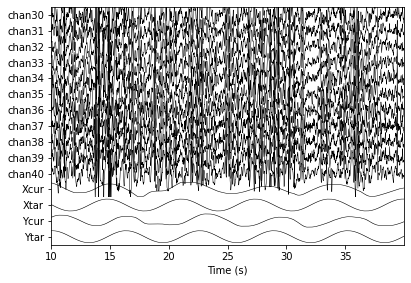

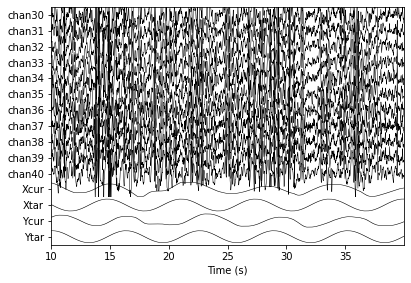

In [11]:
# @markdown Plot selected channels for selected time window:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
# rcParams['figure.figsize'] = [20, 4]
# rcParams['font.size'] =15
# rcParams['axes.spines.top'] = True
# rcParams['axes.spines.right'] = True
# rcParams['figure.autolayout'] = True

mne.viz.plot_raw(extended_raw_filtered, duration=duration, start=start, scalings='auto', title='Filtered data for' + subj_name+ ': Selected channels for selected time window', 
         show=True, block=True, show_scalebars=False, show_scrollbars=False, order=picks)

In [ ]:
# @title 4.3.0. MNE RAW Object --> np.array

# @markdown extended_V_nparray


print(extended_raw_filtered[:][0].shape)

extended_raw2nparray = extended_raw_filtered[:][0].T

print(extended_raw2nparray.shape)

(52, 259920)
(259920, 52)


In [ ]:
# @title (additional) Install & import neuralDSP
! pip install neurodsp
from neurodsp.utils import create_times
from neurodsp.plts.time_series import plot_time_series, plot_instantaneous_measure



In [ ]:
# @title 4.3.2 set parameters & plot single channel
fs = 1000
times = create_times(len(V[:, 0])/fs, fs)
print(times)

plot_time_series(times, extended_raw2nparray[:,57])

[0.00000e+00 1.00000e-03 2.00000e-03 ... 1.34357e+02 1.34358e+02
 1.34359e+02]


# 5: Linear Regressison on filtered data


Need to run section 4, at least up to 4.2





In [ ]:
from scipy import signal

from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


In [ ]:
# @title 5.1. get the filtered V

filtered_V = extended_raw2nparray[:, :-4]

print(filtered_V.shape)

(259920, 48)


In [ ]:
# @title 5.2. from JC: linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from scipy.signal import hilbert
from scipy.ndimage import gaussian_filter

# set up paramters

nt, nchan = filtered_V.shape

cx = np.zeros(nchan,)
cy = np.zeros(nchan,)
for j in range(nchan):
  cx[j] = np.corrcoef(V[:,j], targetX)[0,1]
  cy[j] = np.corrcoef(V[:,j], targetY)[0,1]

def rect_data(y):
  z=np.empty_like(y)
  for i in range(np.size(y,1)):
    z[:,i]=(np.abs(y[:,i]))
    return z
def c_dist(x1,y1,x2,y2):
  d= ((x1-x2) ** 2 + (y1-y2) ** 2 ) ** .5
  return d

# separating data into train and test
secval=100000
v_tr=V[:secval,:]
x_tr=cursorX[:secval]
y_tr=cursorY[:secval]

v_te=V[secval+1:-1,:]
x_te=cursorX[secval+1:-1]
y_te=cursorY[secval+1:-1]

# Creating linear models
alphav=50
lm_x=linear_model.LinearRegression()
lm_y=linear_model.LinearRegression()

lm_x_r = linear_model.Lasso(alpha=alphav)
lm_y_r = linear_model.Lasso(alpha=alphav)


#fitting LMs
lm_x.fit(v_tr,x_tr)
lm_y.fit(v_tr,y_tr)

lm_x_r.fit(v_tr,x_tr)
lm_y_r.fit(v_tr,y_tr)


Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

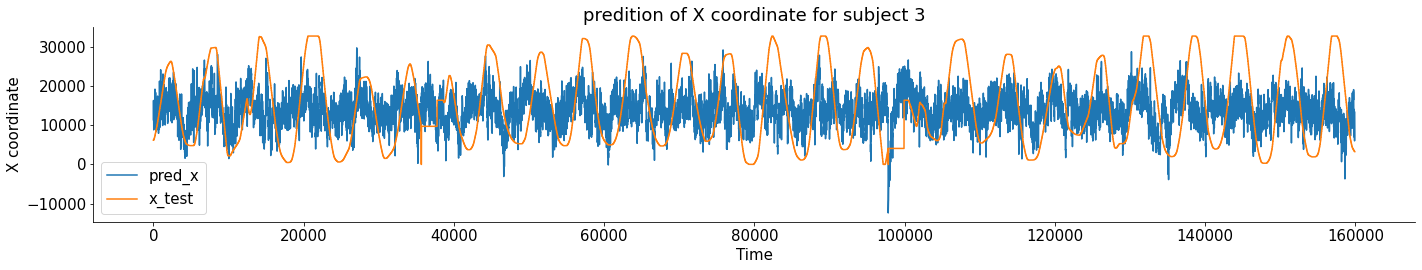

In [ ]:
#X fits_cursor 
p_x=lm_x.predict(v_te)
plt.plot(p_x, label='pred_x')
plt.plot(x_te, label='x_test')
plt.title('predition of X coordinate for '+ subj_name)
plt.xlabel('Time')
plt.ylabel('X coordinate')
plt.legend()
plt.show()

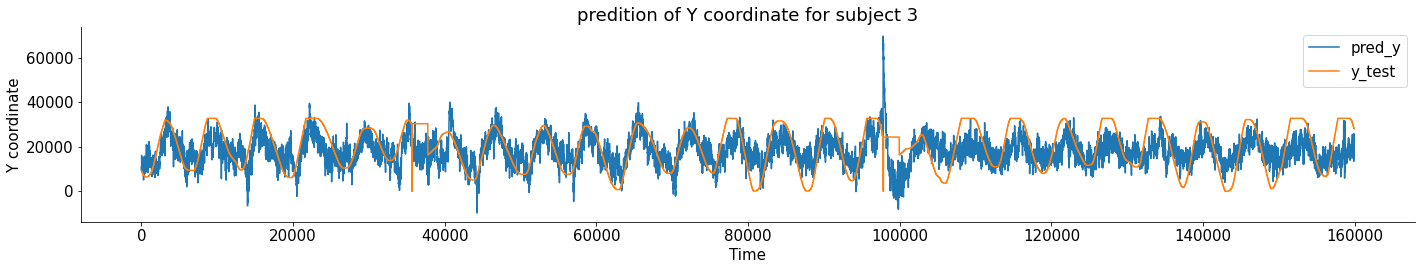

In [ ]:
#Y fits_cursor 
p_y=lm_y.predict(v_te)
plt.plot(p_y, label='pred_y')
plt.plot(y_te, label='y_test')
plt.title('predition of Y coordinate for '+ subj_name)
plt.xlabel('Time')
plt.ylabel('Y coordinate')
plt.legend()
plt.show()

In [ ]:
# @title 5.3. visualize predicted cursor movmenet 


# @markdown copoied Functions: 2D Movement Trajectory plot
import numpy as np
from matplotlib import pyplot as plt

def sample_indices(seq, starting_index, k):
  resulted_seq = seq[starting_index::k]
  n = int(len(seq))
  index_list = list((np.arange(n)*k)[:len(resulted_seq)])
  return resulted_seq, index_list


def plot_mvmt_trajectory(xs, ys, spacing_index, title):
  xs_seq_val = sample_indices(xs, 0, spacing_index)[0]
  ys_seq_val = sample_indices(ys, 0, spacing_index)[0]
  indices = sample_indices(ys, 0, spacing_index)[1]
  # xs_seq_val = sample_indices(xs, 75000, spacing_index)[0]
  # ys_seq_val = sample_indices(ys, 75000, spacing_index)[0]
  # indices = sample_indices(ys, 75000, spacing_index)[1] #change for subj[1]
  print('num of sampled pts from sequences', len(indices))

  ax = plt.axes(aspect=1)
  ax.scatter(xs_seq_val,ys_seq_val, c=indices, s=2)
  ax.set_xlim(-2000, 34500)
  ax.set_ylim(-2000,34500)
  ax.set_title(title)  



num of sampled pts from sequences 3199


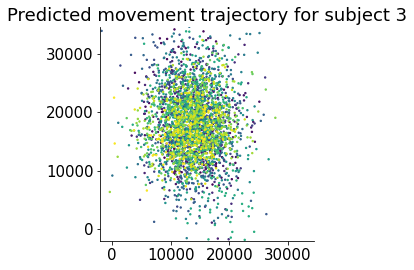

In [ ]:

# @markdown predicted movement trajectory of cursor for selected subject over time 
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plot_mvmt_trajectory(p_x, p_y, spacing_index = 50, title='Predicted movement trajectory for '+ subj_name)

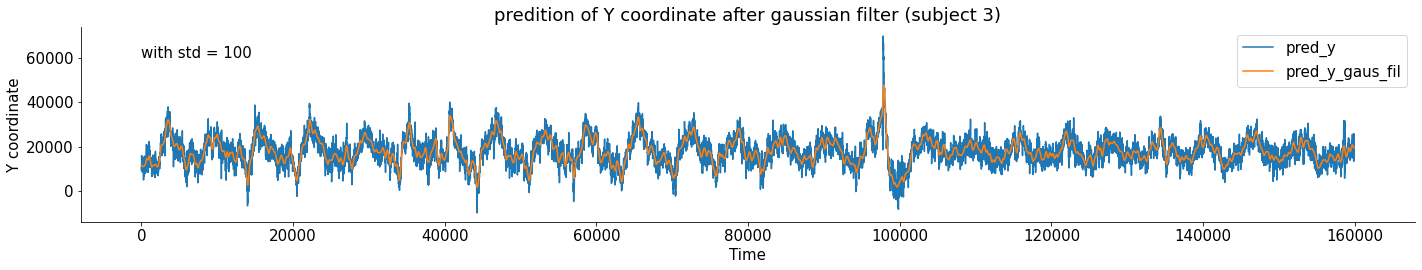

In [ ]:
# @title 5.4. Apply gaussian filter on the prediction

from scipy.ndimage import gaussian_filter1d


p_x_gaus_fil = gaussian_filter1d(p_x, 100)
p_y_gaus_fil = gaussian_filter1d(p_y, 100)


plt.plot(p_y, label = 'pred_y')
plt.plot(p_y_gaus_fil, label = 'pred_y_gaus_fil')
plt.title('predition of Y coordinate after gaussian filter ('+ subj_name+ ')')
plt.xlabel('Time')
plt.ylabel('Y coordinate')
plt.text(x=0, y=60000, s='with std = 100')
plt.legend()
plt.show()

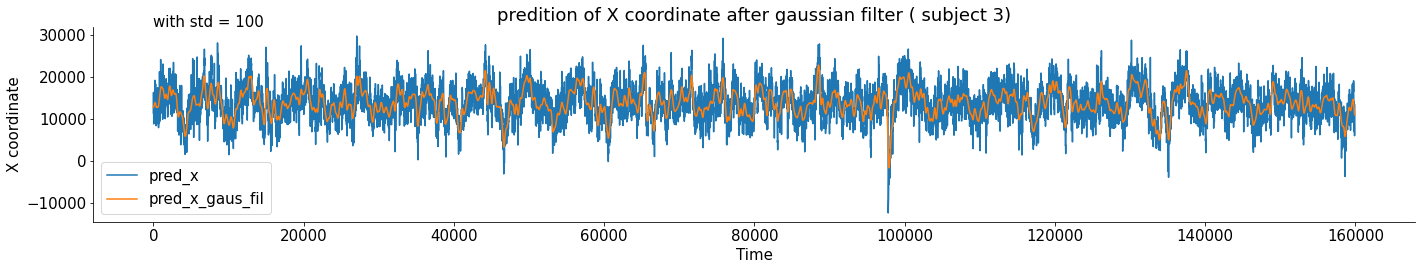

In [ ]:
plt.plot(p_x, label = 'pred_x')
plt.plot(p_x_gaus_fil, label = 'pred_x_gaus_fil')
plt.title('predition of X coordinate after gaussian filter ( '+ subj_name+ ')')
plt.xlabel('Time')
plt.ylabel('X coordinate')
plt.text(x=0, y=32000, s='with std = 100')
plt.legend()
plt.show()

num of sampled pts from sequences 7996


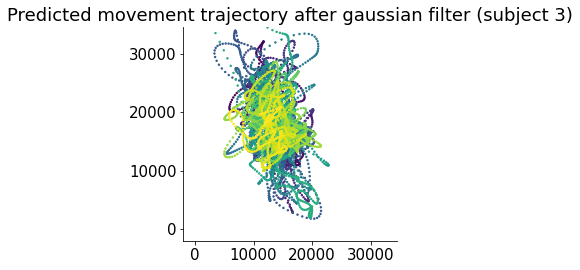

In [ ]:

plot_mvmt_trajectory(p_x_gaus_fil, p_y_gaus_fil, spacing_index = 20, title='Predicted movement trajectory after gaussian filter (' +subj_name+ ')')